# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(citipy)


<module 'citipy.citipy' from 'c:\\Users\\rober\\anaconda3\\envs\\RUTDataViz2023\\lib\\site-packages\\citipy\\citipy.py'>


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print (cities)

Number of cities in the list: 669
['jamestown', 'sisavan', 'rikitea', 'east london', 'ushuaia', 'yellowknife', 'itupiranga', 'broome', 'punta arenas', 'vaini', 'mataura', 'lebu', 'khatanga', 'cabo san lucas', 'albany', 'saryshagan', 'maarianhamina', 'faanui', 'chulman', 'chokurdakh', 'cape town', 'taolanaro', 'busselton', 'mahibadhoo', 'bubaque', 'lesnoy', 'bengkulu', 'souillac', 'geraldton', 'hithadhoo', 'sentyabrskiy', 'bluff', 'genhe', 'narsaq', 'cherdyn', 'arraial do cabo', 'biak', 'carnarvon', 'hualmay', 'ankpa', 'roseburg', 'bethel', 'san carlos de bariloche', 'hobart', 'port moresby', 'port hardy', 'adrar', 'mesyagutovo', 'swan river', 'kapaa', 'lolua', 'luderitz', 'kupino', 'hilo', 'lazaro cardenas', 'sovetskiy', 'aklavik', 'qaanaaq', 'kodiak', 'new norfolk', 'chuy', 'sarata', 'richards bay', 'airai', 'saint-philippe', 'kahului', 'chapada dos guimaraes', 'port lincoln', 'imeni babushkina', 'sioux lookout', 'alta', 'victoria', 'sozimskiy', 'sabha', 'avarua', 'bambous virieux', '

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | sisavan
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | itupiranga
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 17 of Set 1 | maarianhamina
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | chulman
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | taolanaro
City no

In [4]:
print (city_data)

[{'City': 'jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 3.8, 'Humidity': 41, 'Cloudiness': 0, 'Wind Speed': 0.89, 'Country': 'US', 'Date': 1680482412}, {'City': 'sisavan', 'Lat': 39.9, 'Lng': 44.6667, 'Max Temp': 5.95, 'Humidity': 61, 'Cloudiness': 17, 'Wind Speed': 0.3, 'Country': 'AM', 'Date': 1680482413}, {'City': 'rikitea', 'Lat': -23.1203, 'Lng': -134.9692, 'Max Temp': 26.77, 'Humidity': 81, 'Cloudiness': 88, 'Wind Speed': 6.27, 'Country': 'PF', 'Date': 1680482413}, {'City': 'east london', 'Lat': -33.0153, 'Lng': 27.9116, 'Max Temp': 22.86, 'Humidity': 70, 'Cloudiness': 100, 'Wind Speed': 2.01, 'Country': 'ZA', 'Date': 1680482143}, {'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 12.81, 'Humidity': 47, 'Cloudiness': 20, 'Wind Speed': 4.12, 'Country': 'AR', 'Date': 1680482414}, {'City': 'yellowknife', 'Lat': 62.456, 'Lng': -114.3525, 'Max Temp': -9.71, 'Humidity': 62, 'Cloudiness': 75, 'Wind Speed': 1.03, 'Country': 'CA', 'Date': 1680482344}, {'City': 'itupira

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()


City          614
Lat           614
Lng           614
Max Temp      614
Humidity      614
Cloudiness    614
Wind Speed    614
Country       614
Date          614
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,3.80,41,0,0.89,US,1680482412
1,sisavan,39.9000,44.6667,5.95,61,17,0.30,AM,1680482413
2,rikitea,-23.1203,-134.9692,26.77,81,88,6.27,PF,1680482413
3,east london,-33.0153,27.9116,22.86,70,100,2.01,ZA,1680482143
4,ushuaia,-54.8000,-68.3000,12.81,47,20,4.12,AR,1680482414
5,yellowknife,62.4560,-114.3525,-9.71,62,75,1.03,CA,1680482344
6,itupiranga,-5.1347,-49.3267,25.18,96,100,0.24,BR,1680482126
7,broome,42.2506,-75.8330,0.76,47,24,1.34,US,1680482174
8,punta arenas,-53.1500,-70.9167,12.06,47,75,5.66,CL,1680482313
9,vaini,-21.2000,-175.2000,29.09,65,40,5.14,TO,1680482416


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,3.80,41,0,0.89,US,1680482412
1,sisavan,39.9000,44.6667,5.95,61,17,0.30,AM,1680482413
2,rikitea,-23.1203,-134.9692,26.77,81,88,6.27,PF,1680482413
3,east london,-33.0153,27.9116,22.86,70,100,2.01,ZA,1680482143
4,ushuaia,-54.8000,-68.3000,12.81,47,20,4.12,AR,1680482414


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

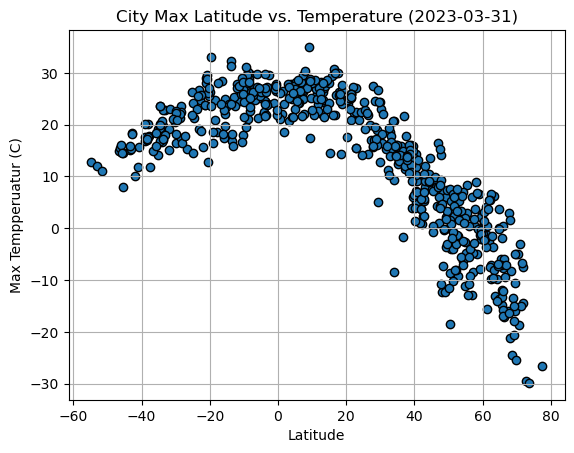

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempperuatur (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-31)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

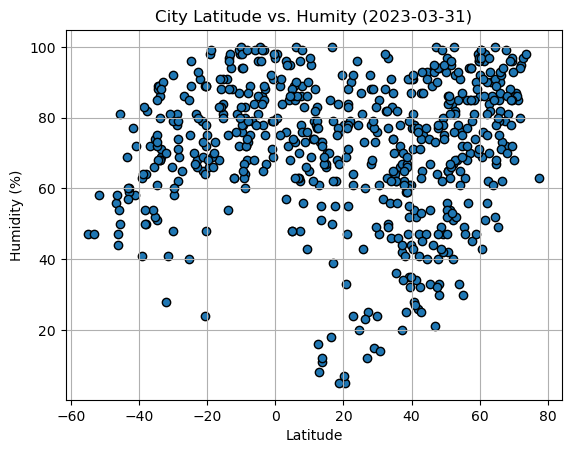

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humity (2023-03-31)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

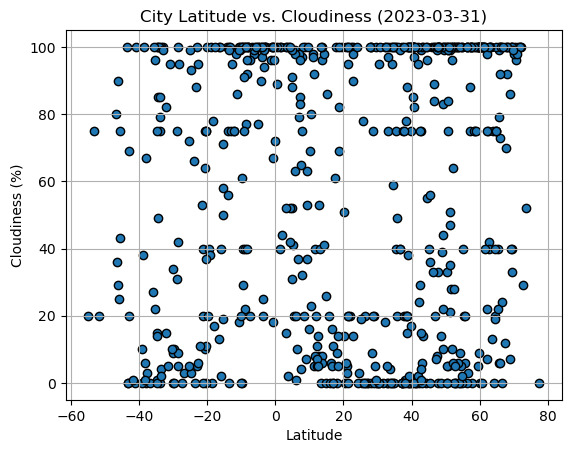

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-31)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

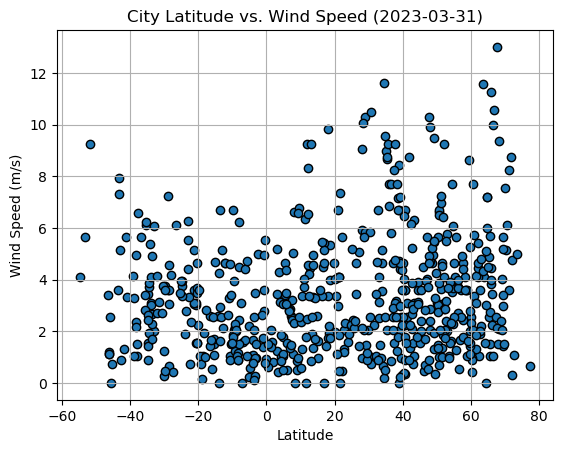

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-31)")
plt.grid(True)
# Save the figu

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, left_annotate, right_annotate,
                      font_size, line_color, x_lable, y_lable):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print (line_eq)

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")

    plt.annotate(line_eq,(left_annotate,right_annotate),fontsize=font_size,color=line_color)
    # Label plot
    plt.xlabel(x_lable)

    plt.ylabel(y_lable)
    plt.grid(True)
    # Print r square value
    print(f"R squared: {rvalue**2}")
    # Show plot
    plt.show()



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,3.80,41,0,0.89,US,1680482412
1,sisavan,39.9000,44.6667,5.95,61,17,0.30,AM,1680482413
5,yellowknife,62.4560,-114.3525,-9.71,62,75,1.03,CA,1680482344
7,broome,42.2506,-75.8330,0.76,47,24,1.34,US,1680482174
12,khatanga,71.9667,102.5000,-14.51,95,100,4.77,RU,1680482417


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,26.77,81,88,6.27,PF,1680482413
3,east london,-33.0153,27.9116,22.86,70,100,2.01,ZA,1680482143
4,ushuaia,-54.8000,-68.3000,12.81,47,20,4.12,AR,1680482414
6,itupiranga,-5.1347,-49.3267,25.18,96,100,0.24,BR,1680482126
8,punta arenas,-53.1500,-70.9167,12.06,47,75,5.66,CL,1680482313


###  Temperature vs. Latitude Linear Regression Plot

y = -0.62x + 33.51
R squared: 0.8133549710689639


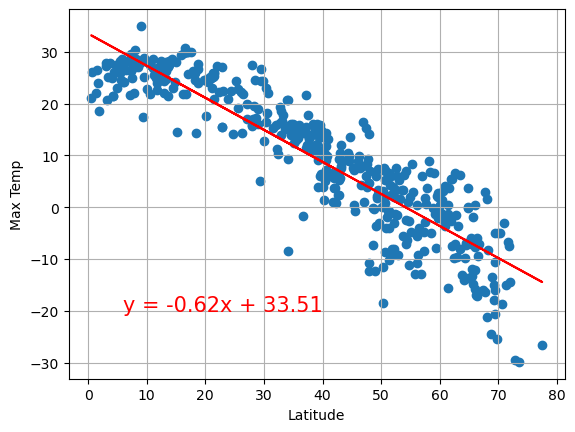

In [21]:
# Linear regression on Northern Hemisphere
# Run linear regression
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],6,-20,
                      15, "red","Latitude","Max Temp")



y = 0.26x + 27.64
R squared: 0.5061488576602585


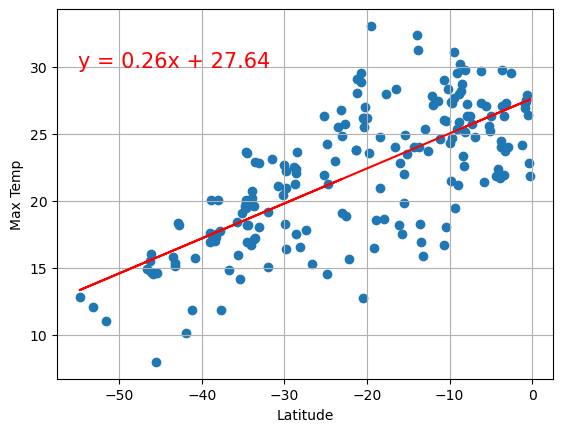

In [33]:
# Linear regression on Southern Hemisphere
# Run linear regression
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-55,30,
                      15, "red","Latitude","Max Temp")


**Discussion about the linear relationship:** In the first plot we see a correlation of .81 and represents a good measure of correlation as r = 1 is perfect positive. The northern hemisphere reprsents greater temperature as we are closer to the equator and a decease as we move away from the equitor. In the case of the sothern hemispher that is on at .50 compaired to the northern at .81, thus representing a less correlation but still can conclude that at the time of the data, the closer you are to the equater it would reprement a higher temperature. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.16x + 64.01
R squared: 0.022510462505975375


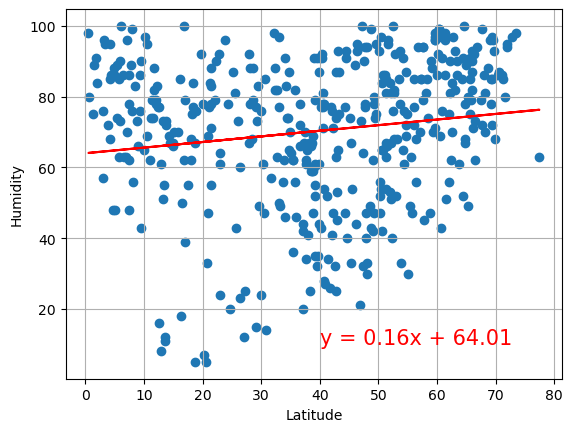

In [37]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 40,10,
                      15, "red", 'Latitude', 'Humidity')


y = 0.57x + 87.03
R squared: 0.26384059011724026


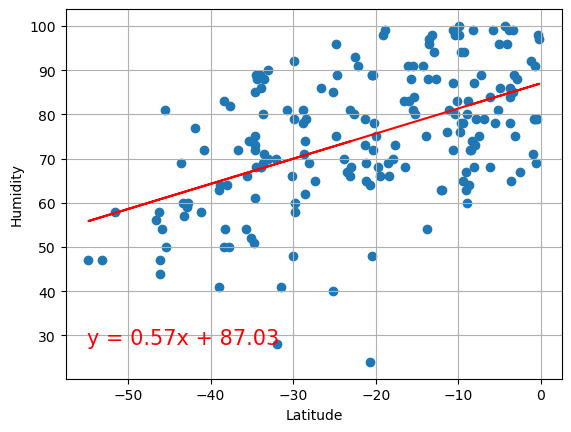

In [38]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],-55,28,
                      15, "red", 'Latitude', 'Humidity')


**Discussion about the linear relationship:** The humidity shows no correlation in the northern hemisphere but does give a slight correlation in the sothern hemispher, with a represetation of .26. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.32x + 43.12
R squared: 0.023301685799490438


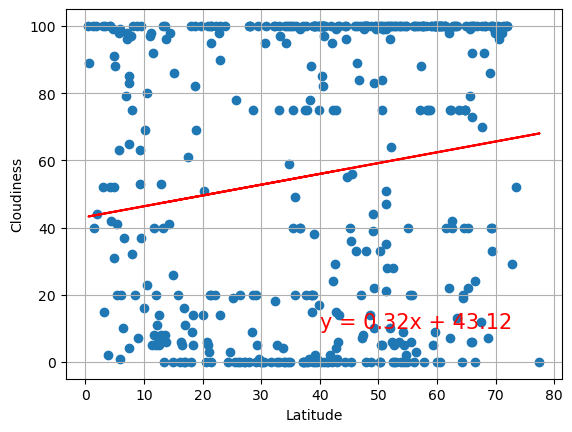

In [39]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],40,10,15,"red","Latitude","Cloudiness")


y = 1.13x + 82.13
R squared: 0.15243965999239478


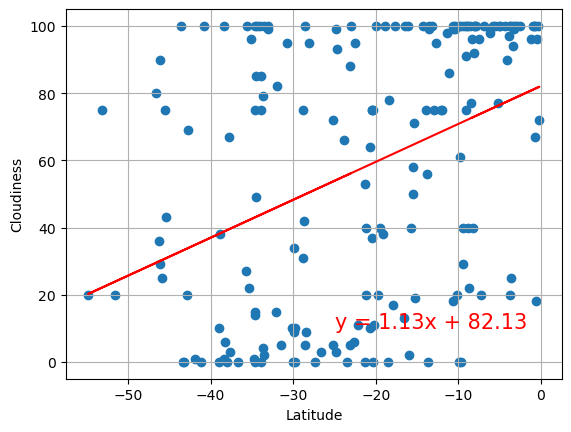

In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-25,10,15,"red","Latitude","Cloudiness")


**Discussion about the linear relationship:** In neither the northern or sothern hemispheres do we see any correlation in the cloudiness in regards to being closer to the equator at the time the data was pulled. Although a very slight .15 in the sothern, this would not represent correlation.  

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 2.92
R squared: 0.017136643404923494


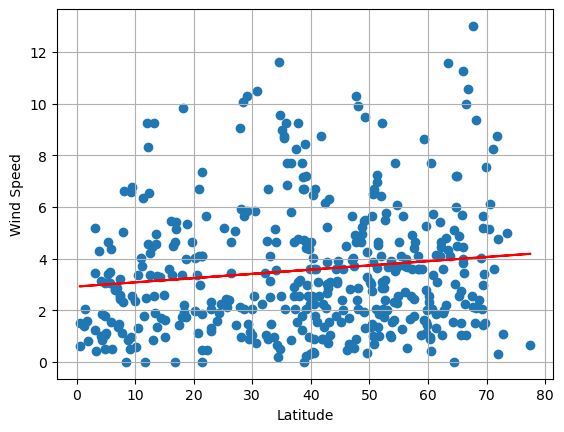

In [44]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],5,15,15,"red","Latitude","Wind Speed")


y = -0.04x + 2.01
R squared: 0.07720280714037353


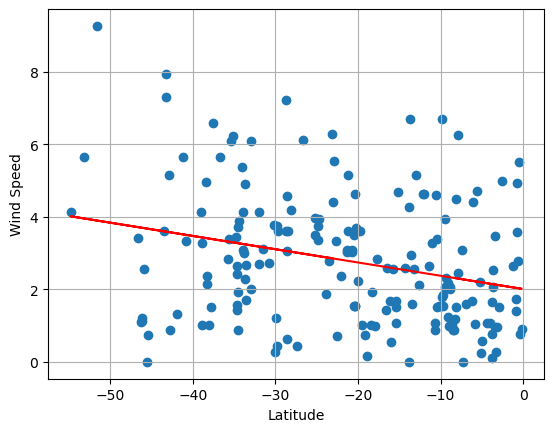

In [45]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-55,12,15,"red","Latitude","Wind Speed")


**Discussion about the linear relationship:** In neither the northern or sothern hemispheres do we see any correlation in the wind speed in regards to being closer to the equator at the time the data was pulled.